In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import fast_gillespie as fg

In [2]:
# Define linear homopolymer

# Create fields
A = fg.Field(name='A', index_dim=1)
a = fg.Field(name='a', index_dim=1)
b = fg.Field(name='b', index_dim=1)
J = fg.Field(name='J', index_dim=2)

# Create rules
R_1 = fg.MonomerCreationRule(name='R_1', rate=1.0, particle=A, sites=[a,b])
R_2 = fg.MonomerAnnihilationRule(name='R_2', rate=1.0, particle=A, sites=[a,b])
R_3 = fg.HeterotypicInteractionCreationRule(name='R_3', rate=1.0, A=A, B=A, a=a, b=b, J=J)
R_4 = fg.HeterotypicInteractionAnnihilationRule(name='R_4', rate=1.0, A=A, B=A, a=a, b=b, J=J)       

space = fg.FockSpace(fields=[A, a, b, J], 
                     rules=[R_1, R_2, R_3, R_4])


In [3]:
# Compute rule eligibility and report initial state
rules_to_apply = [R_1]*10 + [R_3]*9

# Initialize state
space.initialize_to_vacuum()
space.update_eligibility()

applied_rules = []
#report_state(applied_rules)
for R in rules_to_apply:
    R.apply()
    space.update_eligibility()
    applied_rules.append(R)
    #report_state(applied_rules)
space.report_state()


A: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
a: {0, 2, 3, 4, 5, 6, 7, 8, 9}
b: {0, 1, 2, 4, 5, 6, 7, 8, 9}
J: {(8, 7), (4, 6), (5, 1), (3, 0), (7, 2), (0, 8), (2, 5), (6, 9), (9, 4)}
------------


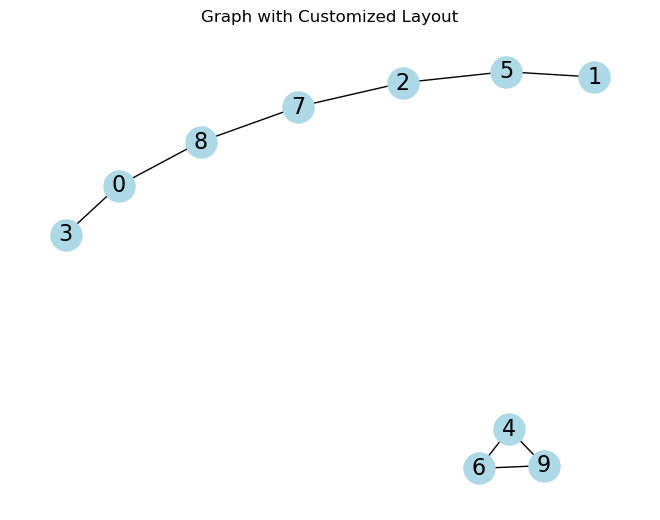

In [4]:
# Create a graph
G = nx.Graph()

# Add dimer nodes
G.add_edges_from(J.indices)

# Add monomer nodes
A_indices = set(i[0] for i in A.indices)
a_indices = set(i[0] for i in a.indices)
b_indices = set(i[0] for i in b.indices)
monomer_indices = A_indices - a_indices - b_indices
G.add_nodes_from(monomer_indices)

# Use spring_layout with custom parameters
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16)
plt.title("Graph with Customized Layout")
plt.show()


In [15]:
# Define branching homopolymer

# Create fields
A = fg.Field(name='A', index_dim=1)
a = fg.Field(name='a', index_dim=1)
b = fg.Field(name='b', index_dim=1)
c = fg.Field(name='c', index_dim=1)
J = fg.Field(name='J', index_dim=2)
K = fg.Field(name='K', index_dim=2)

# Create rules
R_1 = fg.MonomerCreationRule(name='R_1', rate=1.0, particle=A, sites=[a,b,c])
R_2 = fg.MonomerAnnihilationRule(name='R_2', rate=1.0, particle=A, sites=[a,b,c])
R_3 = fg.HeterotypicInteractionCreationRule(name='R_3', rate=1.0, A=A, B=A, a=a, b=b, J=J)
R_4 = fg.HeterotypicInteractionAnnihilationRule(name='R_4', rate=1.0, A=A, B=A, a=a, b=b, J=J)
R_5 = fg.HeterotypicInteractionCreationRule(name='R_5', rate=1.0, A=A, B=A, a=a, b=c, J=K)
R_6 = fg.HeterotypicInteractionAnnihilationRule(name='R_6', rate=1.0, A=A, B=A, a=a, b=c, J=K)
rules = {R_1, R_2, R_3, R_4, R_5, R_6}

def set_state_to_vacuum():
    A.indices = set({})
    a.indices = set({})
    b.indices = set({})
    c.indices = set({})
    J.indices = set({})
    K.indices = set({})

def update_eligibility():
    for R in rules:
        R.compute_eligible_indices()

def report_state(applied_rules):
    #prefix = ''.join([R.name+' ' for R in applied_rules[::-1]])
    A_indices = set(i[0] for i in A.indices)
    a_indices = set(i[0] for i in a.indices)
    b_indices = set(i[0] for i in b.indices)
    c_indices = set(i[0] for i in c.indices)
    #print( f'{prefix}|0> = |{A_indices}_A {a_indices}_a {I.indices}_I>')
    print( f'|0> = |{A_indices}_A {a_indices}_a {b_indices}_b {c_indices}_c {J.indices}_J>')

In [16]:
def color_connected_components(G):
    # Get connected components
    components = list(nx.connected_components(G))
    
    # Generate a list of distinct colors
    colors = 0.8*plt.cm.rainbow(np.linspace(0, 1, len(components)))
    colors[:,3] = 1.0
    np.random.shuffle(colors)
    
    # Create a dictionary mapping each node to its color
    color_map = {}
    for component, color in zip(components, colors):
        for node in component:
            color_map[node] = color
    
    return [color_map[node] for node in G.nodes()]

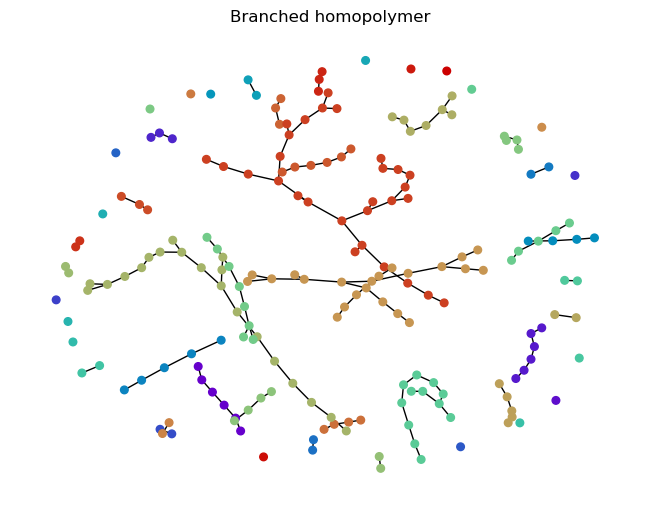

In [18]:

# Compute rule eligibility and report initial state
rules_to_apply = [R_1]*200 + [R_3, R_5]*75

# Initialize state
set_state_to_vacuum()
update_eligibility()

applied_rules = []
#report_state(applied_rules)
for R in rules_to_apply:
    try:
        R.apply()
        update_eligibility()
        applied_rules.append(R)
        #report_state(applied_rules)
    except AssertionError:
        pass;
        
#report_state(applied_rules)


# Create a graph
G = nx.Graph()

# Add dimer nodes
G.add_edges_from(J.indices)
G.add_edges_from(K.indices)

# Add monomer nodes
A_indices = set(i[0] for i in A.indices)
a_indices = set(i[0] for i in a.indices)
b_indices = set(i[0] for i in b.indices)
c_indices = set(i[0] for i in c.indices)
monomer_indices = A_indices - a_indices - c_indices
G.add_nodes_from(monomer_indices)

# Get colors for nodes based on their connected component
node_colors = color_connected_components(G)

# Use spring_layout with custom parameters
pos = nx.spring_layout(G, k=0.1, iterations=50)

# Draw the graph
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=30)
plt.title("Branched homopolymer")
plt.show()